In [48]:

## Import required libraries and modules
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [49]:
# Create the FFNN model
def create_FFNN(input_dim, hidden_units, dense_units, activation):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_dim, activation=activation[0]))
    model.add(Dense(dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [50]:
# Load and preprocess the dataset
def get_data(url):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    return data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
data = get_data(sunspots_url)

In [51]:
def create_sequences(data, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        Y.append(data[i + time_steps])
    return np.array(X), np.array(Y)

time_steps = 12
X_full, Y_full = create_sequences(data, time_steps)

split = int(len(X_full) * 0.8)
trainX, testX = X_full[:split], X_full[split:]
trainY, testY = Y_full[:split], Y_full[split:]

In [52]:
model = create_FFNN(
    input_dim=time_steps,
    hidden_units=10,
    dense_units=1,
    activation=['relu', 'linear']
)

model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)


Epoch 1/20


2246/2246 - 1s - loss: 0.0165 - 1s/epoch - 573us/step
Epoch 2/20
2246/2246 - 1s - loss: 0.0052 - 1s/epoch - 462us/step
Epoch 3/20
2246/2246 - 1s - loss: 0.0043 - 977ms/epoch - 435us/step
Epoch 4/20
2246/2246 - 1s - loss: 0.0039 - 1s/epoch - 484us/step
Epoch 5/20
2246/2246 - 1s - loss: 0.0038 - 1s/epoch - 486us/step
Epoch 6/20
2246/2246 - 1s - loss: 0.0038 - 1s/epoch - 483us/step
Epoch 7/20
2246/2246 - 1s - loss: 0.0037 - 1s/epoch - 485us/step
Epoch 8/20
2246/2246 - 1s - loss: 0.0037 - 1s/epoch - 487us/step
Epoch 9/20
2246/2246 - 1s - loss: 0.0038 - 1s/epoch - 485us/step
Epoch 10/20
2246/2246 - 1s - loss: 0.0037 - 1s/epoch - 486us/step
Epoch 11/20
2246/2246 - 1s - loss: 0.0037 - 1s/epoch - 492us/step
Epoch 12/20
2246/2246 - 1s - loss: 0.0037 - 1s/epoch - 483us/step
Epoch 13/20
2246/2246 - 1s - loss: 0.0037 - 1s/epoch - 485us/step
Epoch 14/20
2246/2246 - 1s - loss: 0.0036 - 1s/epoch - 488us/step
Epoch 15/20
2246/2246 - 1s - loss: 0.0036 - 1s/epoch - 485us/step
Epoch 16/20
2246/2246 - 1s 

In [53]:
# Error printing function
def print_error(trainY, testY, train_predict, test_predict):    
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)


 1/71 [..............................] - ETA: 1s

18/18 [==============================] - 0s 500us/step
Train RMSE: 0.058 RMSE
Test RMSE: 0.075 RMSE


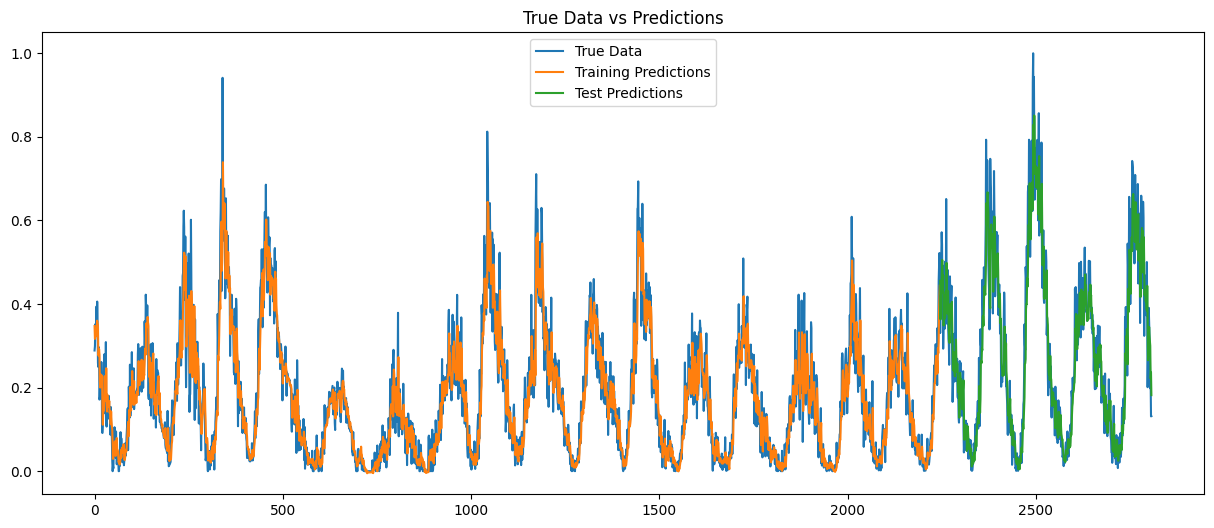

In [54]:
# Plotting function
def plot_predictions(trainY, testY, train_predict, test_predict):
    plt.figure(figsize=(15,6))
    plt.plot(np.concatenate([trainY, testY]), label='True Data')
    plt.plot(np.arange(len(trainY)), train_predict, label='Training Predictions')
    plt.plot(np.arange(len(trainY), len(trainY) + len(testY)), test_predict, label='Test Predictions')
    plt.title('True Data vs Predictions')
    plt.legend()
    plt.show()

plot_predictions(trainY, testY, train_predict, test_predict)